In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv ('/Users/alisha/Downloads/movies_dataset.csv')

In [2]:
data

,Unnamed: 0,IMDb-rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
0,0,4.8,R,John Swab,304,372092,Hollywood / English,English,"20 Feb, 2023",Jan 28 2023,105,Doc\r\n facilitates a fragile truce between th...,Little Dixie,"2,794",John Swab
1,1,6.4,TV-PG,Paul Ziller,73,372091,Hollywood / English,English,"20 Feb, 2023",Feb 05 2023,84,Caterer\r\n Goldy Berry reunites with detectiv...,Grilling Season: A Curious Caterer Mystery,"1,002",John Christian Plummer
2,2,5.2,R,Ben Wheatley,"1,427",343381,Hollywood / English,"English,Hindi","20 Apr, 2021",Jun 18 2021,1h 47min,As the world searches for a cure to a disastro...,In the Earth,"14,419",Ben Wheatley
3,3,8.1,NaN,Venky Atluri,"1,549",372090,Tollywood,Hindi,"20 Feb, 2023",Feb 17 2023,139,The life of a young man and his struggles agai...,Vaathi,"4,878",Venky Atluri
4,4,4.6,NaN,Shaji Kailas,657,372089,Tollywood,Hindi,"20 Feb, 2023",Jan 26 2023,122,A man named Kalidas gets stranded due to the p...,Alone,"2,438",Rajesh Jayaraman
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20543,20543,NaN,NaN,NaN,"1,998",28957,Bollywood / Indian,Hindi,"01 Jan, 1970",Mar 13 1959,NaN,NaN,Bhai-Bahen,"6,219",NaN
20544,20544,7.7,NaN,Bimal Roy,"6,080",28958,Bollywood / Indian,Hindi,"01 Jan, 1970",May 13 1955,159,Devdas and Parvati had been inseparable as chi...,Devdas,"16,376","Rajinder Singh Bedi, Saratchandra Chatterjee, ..."
20545,20545,8.0,NaN,NaN,"3,276",30459,Bollywood / Indian,Hindi,"01 Jan, 1970",Mar 28 1958,1h 50min,"While driving his car on a rainy night, Anand'...",Madhumati,"7,220",NaN
20546,20546,NaN,NaN,NaN,309,371669,Wrestling,English,"10 Feb, 2023",Feb 09 2023,NaN,NaN,TNA.Impact 2023-02-09,"1,419",NaN


In [3]:
count_of_missing_values=data.isna().sum()  
pd.DataFrame(data.isna().sum())  

,0
Unnamed: 0,0
IMDb-rating,841
appropriate_for,9476
director,1938
downloads,1
id,0
industry,1
language,542
posted_date,1
release_date,1


In [4]:
total_values = np.product(data.shape)
numerator = count_of_missing_values.sum()
miss_p  = (numerator/ total_values)*100
print(" The percentage of missing values from the dataset is :", miss_p)

 The percentage of missing values from the dataset is : 5.990526247485562


# Data Cleaning and Preperation


In [6]:
data['IMDb-rating']=data['IMDb-rating'].fillna(np.mean(data['IMDb-rating']))

data['appropriate_for']=data['appropriate_for'].fillna('Unrated')

data['appropriate_for'] =data['appropriate_for'].replace('Not Rated', 'Unrated')

data['views']=data['views'].fillna('0')
data['views'].isnull().sum()
data['views'] = data['views'].apply(lambda x:(x.replace(',', ''))).astype(int)

In [7]:
data['title'].value_counts()

Vaathi                                           402
Who Invited Charlie?                             402
The Girl Who Escaped: The Kara Robinson Story    402
Little Dixie                                     202
Consent                                          202
                                                ... 
Beyond Valkyrie: Dawn of the 4th Reich             1
Loaded                                             1
3096 Days                                          1
Sex, Death and Bowling                             1
A Haunted House                                    1
Name: title, Length: 16572, dtype: int64

In [8]:
counts = data['title'].value_counts()
counts = counts[counts>76]

duplicate_titles=counts.index.tolist()
duplicate_titles

['Vaathi',
 'Who Invited Charlie?',
 'The Girl Who Escaped: The Kara Robinson Story',
 'Little Dixie',
 'Consent',
 'The Inspection',
 'WWE Smackdown 2023-02-10',
 'Vacation Home Nightmare',
 'Shehzada',
 'Carnifex',
 'Marlowe',
 'Baby Ruby',
 'Your Place or Mine',
 'WWE Raw 2023-02-13',
 'TNA.Impact 2023-02-09']

In [9]:
import math
def fix_duplicates(df,x):
    y = 0
    temp= []

    y=math.ceil(np.mean(x[x['title']==df]['views']))
    temp=x[x['title']==df].iloc[0]
    print(temp)

    x= x.drop(x[x['title']==df].index)

    x = x.append(temp,ignore_index = True)
    x.loc[x['title'] == df, 'views'] = y
    return x

In [10]:
for i in duplicate_titles:
    data = fix_duplicates(i,data)

Unnamed: 0                                                         3
IMDb-rating                                                      8.1
appropriate_for                                              Unrated
director                                                Venky Atluri
downloads                                                      1,549
id                                                            372090
industry                                                   Tollywood
language                                                       Hindi
posted_date                                             20 Feb, 2023
release_date                                             Feb 17 2023
run_time                                                         139
storyline          The life of a young man and his struggles agai...
title                                                         Vaathi
views                                                           4878
writer                            

Unnamed: 0                                                        29
IMDb-rating                                                      6.1
appropriate_for                                                    R
director                                                 Neil Jordan
downloads                                                        283
id                                                            371876
industry                                         Hollywood / English
language                                                     English
posted_date                                             15 Feb, 2023
release_date                                             Feb 15 2023
run_time                                                         110
storyline          In late 1930's Bay City, a brooding, down on h...
title                                                        Marlowe
views                                                           3044
writer              William Monaha

In [11]:
data

,Unnamed: 0,IMDb-rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
0,1,6.400000,TV-PG,Paul Ziller,73,372091,Hollywood / English,English,"20 Feb, 2023",Feb 05 2023,84,Caterer\r\n Goldy Berry reunites with detectiv...,Grilling Season: A Curious Caterer Mystery,1002,John Christian Plummer
1,2,5.200000,R,Ben Wheatley,"1,427",343381,Hollywood / English,"English,Hindi","20 Apr, 2021",Jun 18 2021,1h 47min,As the world searches for a cure to a disastro...,In the Earth,14419,Ben Wheatley
2,4,4.600000,Unrated,Shaji Kailas,657,372089,Tollywood,Hindi,"20 Feb, 2023",Jan 26 2023,122,A man named Kalidas gets stranded due to the p...,Alone,2438,Rajesh Jayaraman
3,5,5.400000,Unrated,Srinivas Gavireddy,746,372088,Tollywood,Hindi,"20 Feb, 2023",Nov 26 2021,131,"Bagaram,\r\n after inheriting his grandfather'...",Anubhavinchu Raja,2940,"Srinivas Gavireddy, Mayukh Adithya"
4,6,5.762151,TV-PG,NaN,"5,332",372059,Wrestling,English,"19 Feb, 2023",Feb 18 2023,200,Undisputed\r\n WWE Universal title: Reigns vs ...,WWE Elimination Chamber,11978,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17181,29,6.100000,R,Neil Jordan,283,371876,Hollywood / English,English,"15 Feb, 2023",Feb 15 2023,110,"In late 1930's Bay City, a brooding, down on h...",Marlowe,3149,"William Monahan, John Banville, Raymond Chandler"
17182,43,5.000000,Unrated,Bess Wohl,622,371674,Hollywood / English,English,"10 Feb, 2023",Feb 03 2023,93,The\r\n tightly scripted world of a vlogger an...,Baby Ruby,9201,Bess Wohl
17183,42,5.700000,PG-13,Aline Brosh McKenna,"2,712",371760,Hollywood / English,"English,Hindi","13 Feb, 2023",Feb 10 2023,109,Two\r\n long-distance best friends change each...,Your Place or Mine,14758,Aline Brosh McKenna
17184,44,5.762151,Unrated,NaN,"2,609",371816,Wrestling,English,"14 Feb, 2023",Feb 13 2023,NaN,NaN,WWE Raw 2023-02-13,6658,NaN


In [12]:
data.shape

(17186, 15)

In [13]:
import re
def runtime_conversion(runtime):
    if runtime.isdigit():
        return int(runtime)
    else:
        # Define regex to extract numerical values
        hr_pattern = re.compile(r'(\d+)\s*(h|hr|hour)s?')
        min_pattern = re.compile(r'(\d+)\s*(m|min)')

        # Extracting numerical values from the input string
        hrs = 0
        mins = 0
        match = hr_pattern.search(runtime)
        if match:
            hrs = int(match.group(1))
        match = min_pattern.search(runtime)
        if match:
            mins = int(match.group(1))

        # Convert hours to minutes and return the total runtime in minutes
        return hrs * 60 + mins

In [14]:
#Replaced the NaN values with the average run time of movies
data['run_time'] = data['run_time'].fillna('90')

In [15]:
#Convert all the values of run_time to a standard int format
data['run_time'] = data['run_time'].apply(runtime_conversion)

In [16]:
#dropped industry with null value 
data=data.drop(data[data['id']==371111].index, axis=0)

In [17]:
# Dropping the columns director, storyline, writer as we don't require them
data_cleaned = data.drop(['director', 'writer','storyline'], axis=1)


In [18]:
from datetime import datetime
def conv_posted_date(v):
    format_1 = '%d %b, %Y'
    date = datetime.strptime(v,format_1)
    return date
def conv_release_date(v):
    format_1 = '%b %d %Y'
    date = datetime.strptime(v,format_1)
    return date

In [19]:
data_cleaned['posted_date'] = data_cleaned['posted_date'].apply(conv_posted_date)
data_cleaned['release_date'] = data_cleaned['release_date'].apply(conv_release_date)
data_cleaned

,Unnamed: 0,IMDb-rating,appropriate_for,downloads,id,industry,language,posted_date,release_date,run_time,title,views
0,1,6.400000,TV-PG,73,372091,Hollywood / English,English,2023-02-20,2023-02-05,84,Grilling Season: A Curious Caterer Mystery,1002
1,2,5.200000,R,"1,427",343381,Hollywood / English,"English,Hindi",2021-04-20,2021-06-18,107,In the Earth,14419
2,4,4.600000,Unrated,657,372089,Tollywood,Hindi,2023-02-20,2023-01-26,122,Alone,2438
3,5,5.400000,Unrated,746,372088,Tollywood,Hindi,2023-02-20,2021-11-26,131,Anubhavinchu Raja,2940
4,6,5.762151,TV-PG,"5,332",372059,Wrestling,English,2023-02-19,2023-02-18,200,WWE Elimination Chamber,11978
...,...,...,...,...,...,...,...,...,...,...,...,...
17181,29,6.100000,R,283,371876,Hollywood / English,English,2023-02-15,2023-02-15,110,Marlowe,3149
17182,43,5.000000,Unrated,622,371674,Hollywood / English,English,2023-02-10,2023-02-03,93,Baby Ruby,9201
17183,42,5.700000,PG-13,"2,712",371760,Hollywood / English,"English,Hindi",2023-02-13,2023-02-10,109,Your Place or Mine,14758
17184,44,5.762151,Unrated,"2,609",371816,Wrestling,English,2023-02-14,2023-02-13,90,WWE Raw 2023-02-13,6658


In [20]:
from scipy import stats
t=data_cleaned.mode()['language'][0]
print(t)

English


In [21]:
data_cleaned['language']=data_cleaned['language'].fillna('English')

In [22]:
data

,Unnamed: 0,IMDb-rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
0,1,6.400000,TV-PG,Paul Ziller,73,372091,Hollywood / English,English,"20 Feb, 2023",Feb 05 2023,84,Caterer\r\n Goldy Berry reunites with detectiv...,Grilling Season: A Curious Caterer Mystery,1002,John Christian Plummer
1,2,5.200000,R,Ben Wheatley,"1,427",343381,Hollywood / English,"English,Hindi","20 Apr, 2021",Jun 18 2021,107,As the world searches for a cure to a disastro...,In the Earth,14419,Ben Wheatley
2,4,4.600000,Unrated,Shaji Kailas,657,372089,Tollywood,Hindi,"20 Feb, 2023",Jan 26 2023,122,A man named Kalidas gets stranded due to the p...,Alone,2438,Rajesh Jayaraman
3,5,5.400000,Unrated,Srinivas Gavireddy,746,372088,Tollywood,Hindi,"20 Feb, 2023",Nov 26 2021,131,"Bagaram,\r\n after inheriting his grandfather'...",Anubhavinchu Raja,2940,"Srinivas Gavireddy, Mayukh Adithya"
4,6,5.762151,TV-PG,NaN,"5,332",372059,Wrestling,English,"19 Feb, 2023",Feb 18 2023,200,Undisputed\r\n WWE Universal title: Reigns vs ...,WWE Elimination Chamber,11978,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17181,29,6.100000,R,Neil Jordan,283,371876,Hollywood / English,English,"15 Feb, 2023",Feb 15 2023,110,"In late 1930's Bay City, a brooding, down on h...",Marlowe,3149,"William Monahan, John Banville, Raymond Chandler"
17182,43,5.000000,Unrated,Bess Wohl,622,371674,Hollywood / English,English,"10 Feb, 2023",Feb 03 2023,93,The\r\n tightly scripted world of a vlogger an...,Baby Ruby,9201,Bess Wohl
17183,42,5.700000,PG-13,Aline Brosh McKenna,"2,712",371760,Hollywood / English,"English,Hindi","13 Feb, 2023",Feb 10 2023,109,Two\r\n long-distance best friends change each...,Your Place or Mine,14758,Aline Brosh McKenna
17184,44,5.762151,Unrated,NaN,"2,609",371816,Wrestling,English,"14 Feb, 2023",Feb 13 2023,90,NaN,WWE Raw 2023-02-13,6658,NaN


In [23]:
count_of_missing_values=data_cleaned.isna().sum()  
pd.DataFrame(data_cleaned.isna().sum()) 

,0
Unnamed: 0,0
IMDb-rating,0
appropriate_for,0
downloads,0
id,0
industry,0
language,0
posted_date,0
release_date,0
run_time,0


# Exploratory Data Analysis

In [25]:
data_cleaned.dtypes

Unnamed: 0                  int64
IMDb-rating               float64
appropriate_for            object
downloads                  object
id                          int64
industry                   object
language                   object
posted_date        datetime64[ns]
release_date       datetime64[ns]
run_time                    int64
title                      object
views                       int64
dtype: object

In [26]:
data_status = data_cleaned.copy()
data_status['downloads'] = data_status['downloads'].str.replace(',','')

data_status["downloads"] = pd.to_numeric(data_status["downloads"])

data_status.dtypes

Unnamed: 0                  int64
IMDb-rating               float64
appropriate_for            object
downloads                   int64
id                          int64
industry                   object
language                   object
posted_date        datetime64[ns]
release_date       datetime64[ns]
run_time                    int64
title                      object
views                       int64
dtype: object

In [27]:
import pandas as pd
from scipy.stats import pearsonr
 

# Convert dataframe into series
list1 = data_status['downloads']
list2 = data_status['IMDb-rating']
 
# Apply the pearsonr()
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.132


In [28]:
data_status['industry']=data_status['industry'].astype('category').cat.codes
data_status['language']=data_status['language'].astype('category').cat.codes
data_status['appropriate_for']=data_status['appropriate_for'].astype('category').cat.codes

In [29]:
data_status.release_date=pd.to_datetime(data_status.release_date)
data_status.release_date=pd.to_numeric(data_status.release_date)

In [30]:
lindata = data_status.copy()
corr_data = lindata.corr()['downloads'].sort_values()
corr_data

id                -0.191444
industry          -0.124834
appropriate_for   -0.042403
release_date      -0.000706
IMDb-rating        0.131914
Unnamed: 0         0.165327
language           0.304343
run_time           0.369027
views              0.946408
downloads          1.000000
Name: downloads, dtype: float64

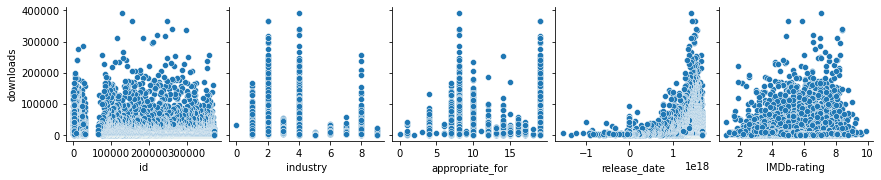

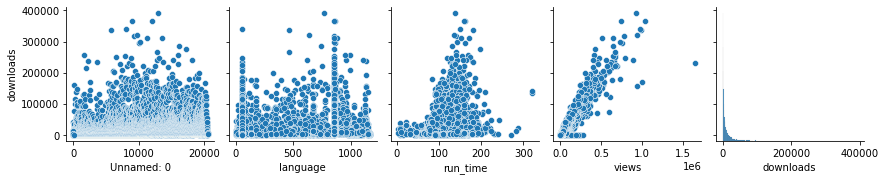

In [31]:
import seaborn as sns

for i in range(0, len(corr_data.index), 5):
    sns.pairplot(data=lindata,
                x_vars = corr_data.index[i : i + 5],
                y_vars = ['downloads'])

We observe that Rumtime, Views, Language and IMDb-rating have +ve correlation and industry, appropriate for, release-date variables have -ve correlation with Downloads.
Also, the variables views, runtime and language have the highest correlation values which implies that these variables highly affects the number of downloads, whereas variables like release_date and appropriate_for have lowest correlation values which implies they have very less impact on the number of downloads.

What is the highest pirated movie together and from each industry?

In [32]:
vd =data_cleaned[['title','views', 'industry']].sort_values(by='views', ascending=False)
vd

,title,views,industry
6993,Baaghi 2,1638533,Bollywood / Indian
7400,Tiger Zinda Hai,1038317,Bollywood / Indian
6585,Raid,993825,Bollywood / Indian
4666,Avengers: Endgame,991133,Hollywood / English
6643,Avengers: Infinity War,969673,Hollywood / English
...,...,...,...
358,TNA.Impact 2022-12-08,888,Wrestling
548,TNA.Impact 2022-11-03,873,Wrestling
502,TNA.Impact 2022-11-10,852,Wrestling
2749,Free Byrd,698,Hollywood / English


Text(0.5, 1.0, 'Highest viewed pirated Movies by Industry')

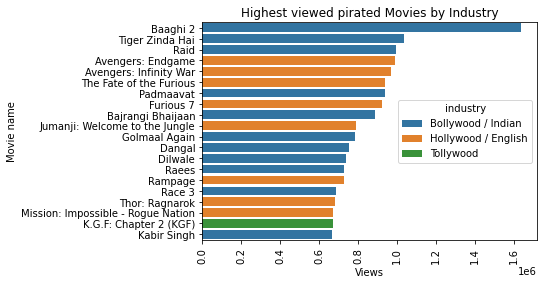

In [33]:
import seaborn as sns

sns.barplot(data=vd[0:20], y='title', x='views', hue = 'industry', orient='h', dodge=False)
plt.ylabel('Movie name')
plt.xlabel('Views')
plt.xticks(rotation=90)
plt.title('Highest viewed pirated Movies by Industry')

##Which industry is mostly affected by piracy?

In [34]:
import matplotlib.pyplot as plt
x=[]
industry_rate=data_cleaned['industry'].value_counts().values
industry_name = data_cleaned['industry'].value_counts().index
for i in industry_rate:
    x.append((0.5)*i + 0.5*1700)

Text(0.5, 1.0, 'Industry affected by Piracy ( Normalized Values)')

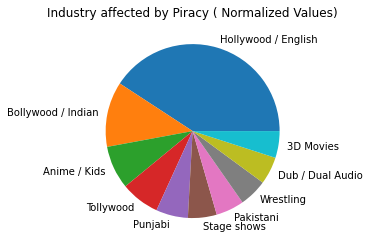

In [35]:
fig, ax = plt.subplots()

# ax.bar(industry_name, x)
plt.pie(x, labels = industry_name)

plt.xticks(rotation=80)

plt.title('Industry affected by Piracy ( Normalized Values)')

We can obsereve that Hollywood/English Industry is the most affected by Piracy followed by Bollywood/Indian Industry.